In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
import math
%matplotlib notebook

In [29]:
N = 10000
x0 = 0
x1 = 2
def f(x):
    return (2/((2**2+x**2)**(3/2)))      

In [30]:
N = 10000
x0 = 0
x1 = 2
def f(x):
    return (2/((2**2+x**2)**(3/2)))      
x = np.linspace(x0,x1,N)
y = f(x)

max_f = max(y)
print(max_f)

0.25


In [31]:
random_x = x0+(x1-x0)*np.random.random(N)
random_y = np.random.random(N)*max_f

below = np.where(random_y < f(random_x))
above = np.where(random_y >= f(random_x))

ratio = float(len(below[0])/N)
area = (x1-x0)*max_f
integral = ratio*area
print(' ratio: {0}\n area: {1}\n integral: {2}\n'.format(ratio,area,integral))


 ratio: 0.7041
 area: 0.5
 integral: 0.35205



In [32]:
print("Exact Solution = 0.3535533905932738")
print("Monte Carlo Solution = 0.35625")

Exact Solution = 0.3535533905932738
Monte Carlo Solution = 0.35625


<IPython.core.display.Javascript object>


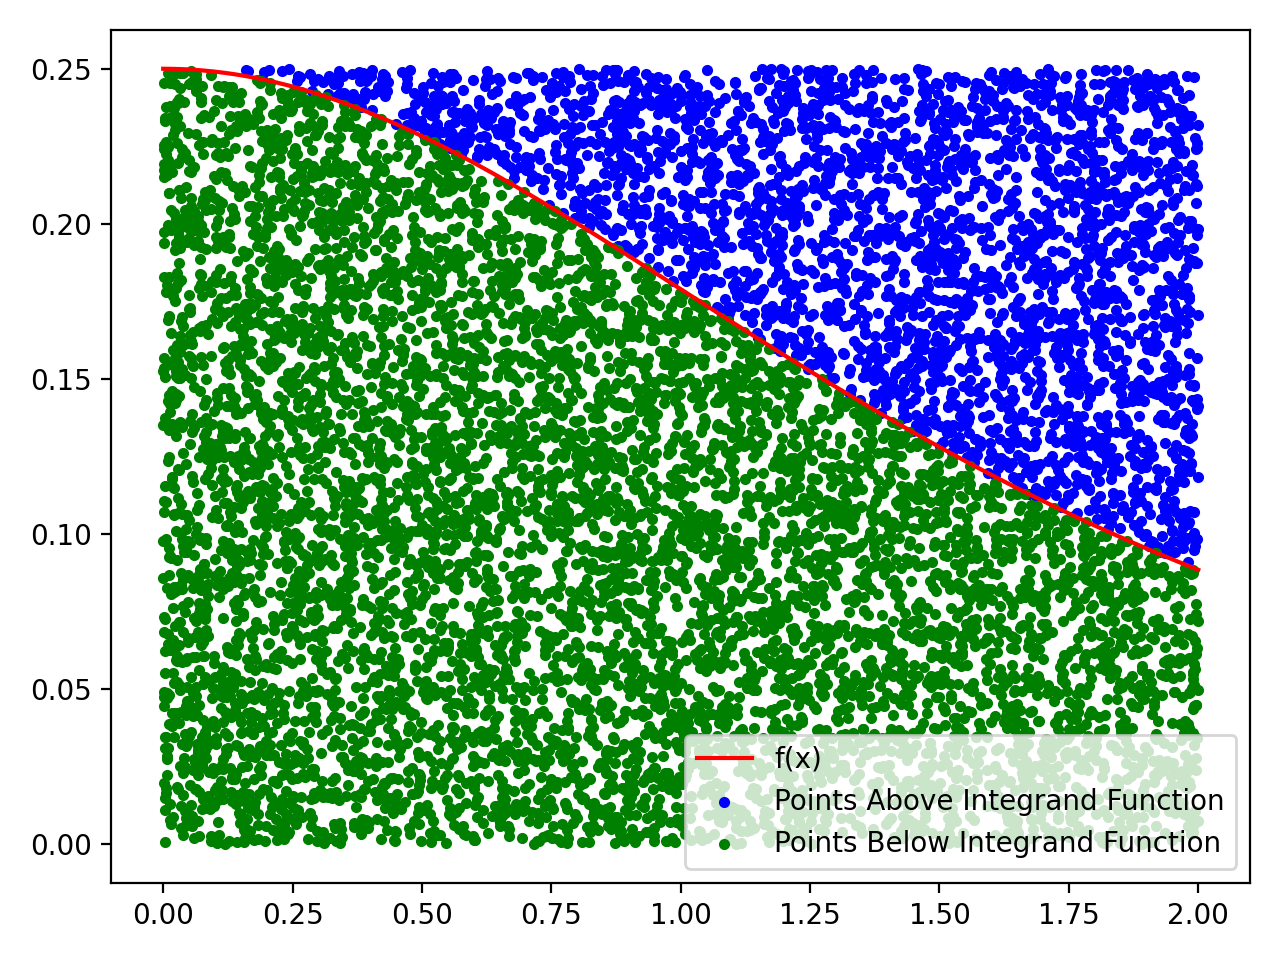

In [33]:
fig = plt.figure('Monte Carlo Integration')
plt.scatter(random_x[above], random_y[above], color = "blue", marker = '.', label = 'Points Above Integrand Function')
plt.scatter(random_x[below], random_y[below], color = "green", marker = '.',label='Points Below Integrand Function')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();

In [34]:
data = open("decay_data.txt","r")

<IPython.core.display.Javascript object>


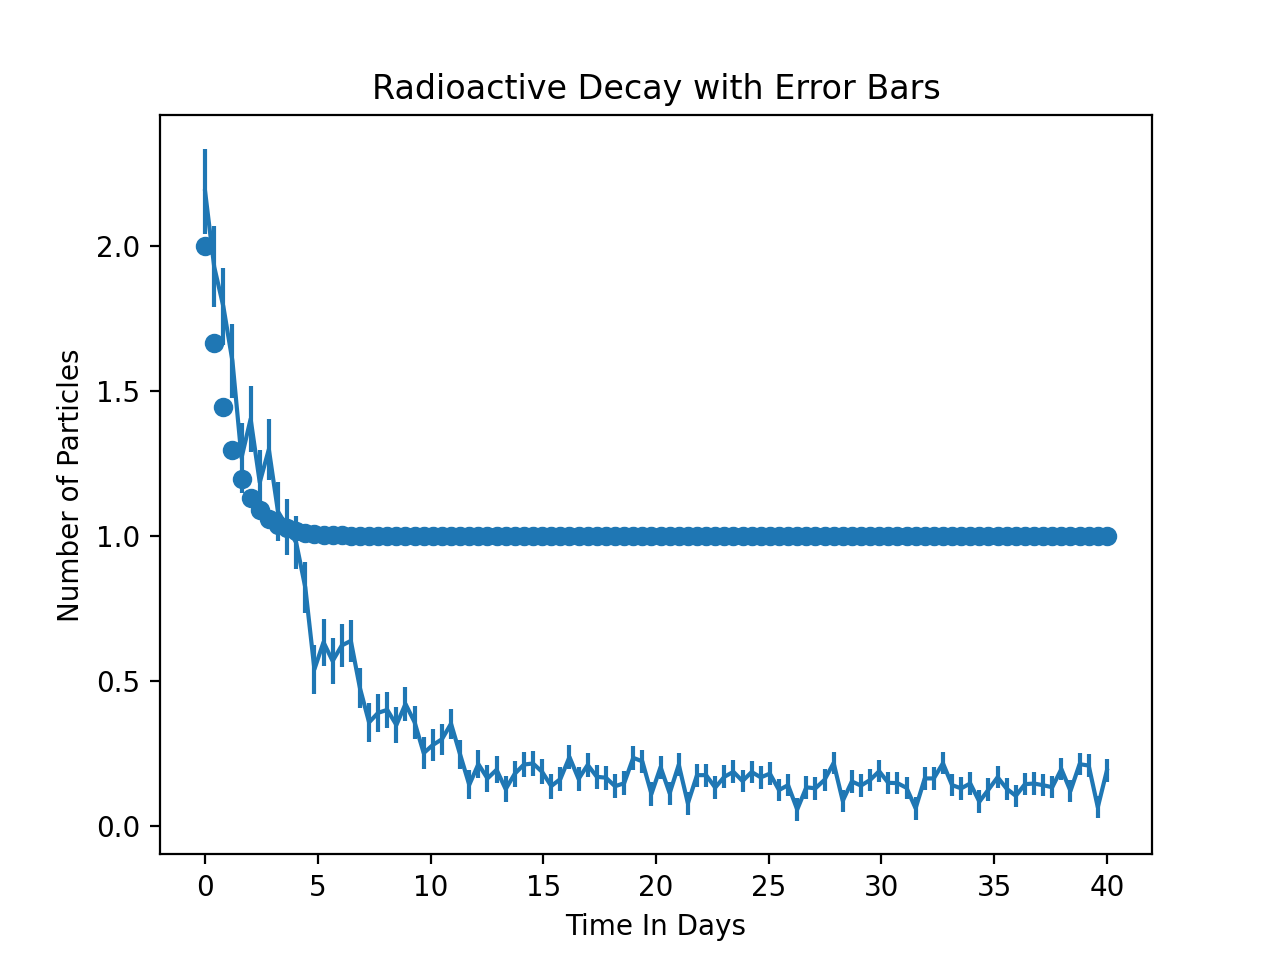

In [35]:
data = np.loadtxt('decay_data.txt')
fig, ax = plt.subplots()
x = data[:, 0]
y = data[:, 1]
yerr = data[:, 2]
ax.errorbar(x,y,yerr)
ax.set_xlabel('Time In Days')
ax.set_ylabel('Number of Particles')
ax.set_title('Radioactive Decay with Error Bars')
plt.show()

In [36]:
def get_chi_squared(x,y,sigma,p):
    RR = 1.0
    for i in range(len(x)):
        y_prime = ((p[0]*np.exp(-t/p[1]))+p[2])
        RR = RR + ((y[i]-y_prime/sigma)**2)
    return RR

In [37]:
data = np.loadtxt('decay_data.txt')
x = data[:, 0]
y = data[:, 1]

y = ((np.exp(-x/1))+1)
fig3 = plt.scatter(x,y)
plt.show()

In [38]:
def get_chi_squared(x,y,sigma,p):
    RR = 0.0
    for i in range(len(x)):
        y_prime = ((p[0]*np.exp(-x[i]/p[1]))+p[2])
        RR = RR + ((y[i]-y_prime/sigma)**2)
    return RR

In [39]:
def f_line(x,p0,p1,p2):
    return (p0*np.exp(-x/p1))+p2

In [40]:
N = 10000
sigma = 1
init_par = np.array([1,1,1])
par_list, RRs = [init_par], [get_chi_squared(x, y, sigma, init_par)]

for i in range (N):
    test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5),np.random.normal(par_list[-1][2],0.5)]
    RR_test = get_chi_squared(x,y,sigma,test_par)
    t = (np.random.random() <= (RRs[-1])/RR_test )
    if t:
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs) 
chisq = RR_min
best_i = RRs.index(RR_min)
best_pars = par_list[best_i]
print("best p0 = {0}, best p1 = {1}, best p2 = {2}, chi**2 = {3}, loc = {4}".format(best_pars[0], best_pars[1], best_pars[2], RR_min, best_i) )

<ipython-input-38-0804034dbbac>:5: RuntimeWarning: overflow encountered in double_scalars
  RR = RR + ((y[i]-y_prime/sigma)**2)
<ipython-input-38-0804034dbbac>:4: RuntimeWarning: overflow encountered in exp
  y_prime = ((p[0]*np.exp(-x[i]/p[1]))+p[2])


best p0 = 1, best p1 = 1, best p2 = 1, chi**2 = 0.0, loc = 0


In [41]:
n = 25
dof = n - len(init_par) - 1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('Fit Results:\n')
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue)

Fit Results:

 chi2 =  0.0 
 dof =  21 
 reduced chi2 =  0.0 
 p-value =  1.0


<IPython.core.display.Javascript object>


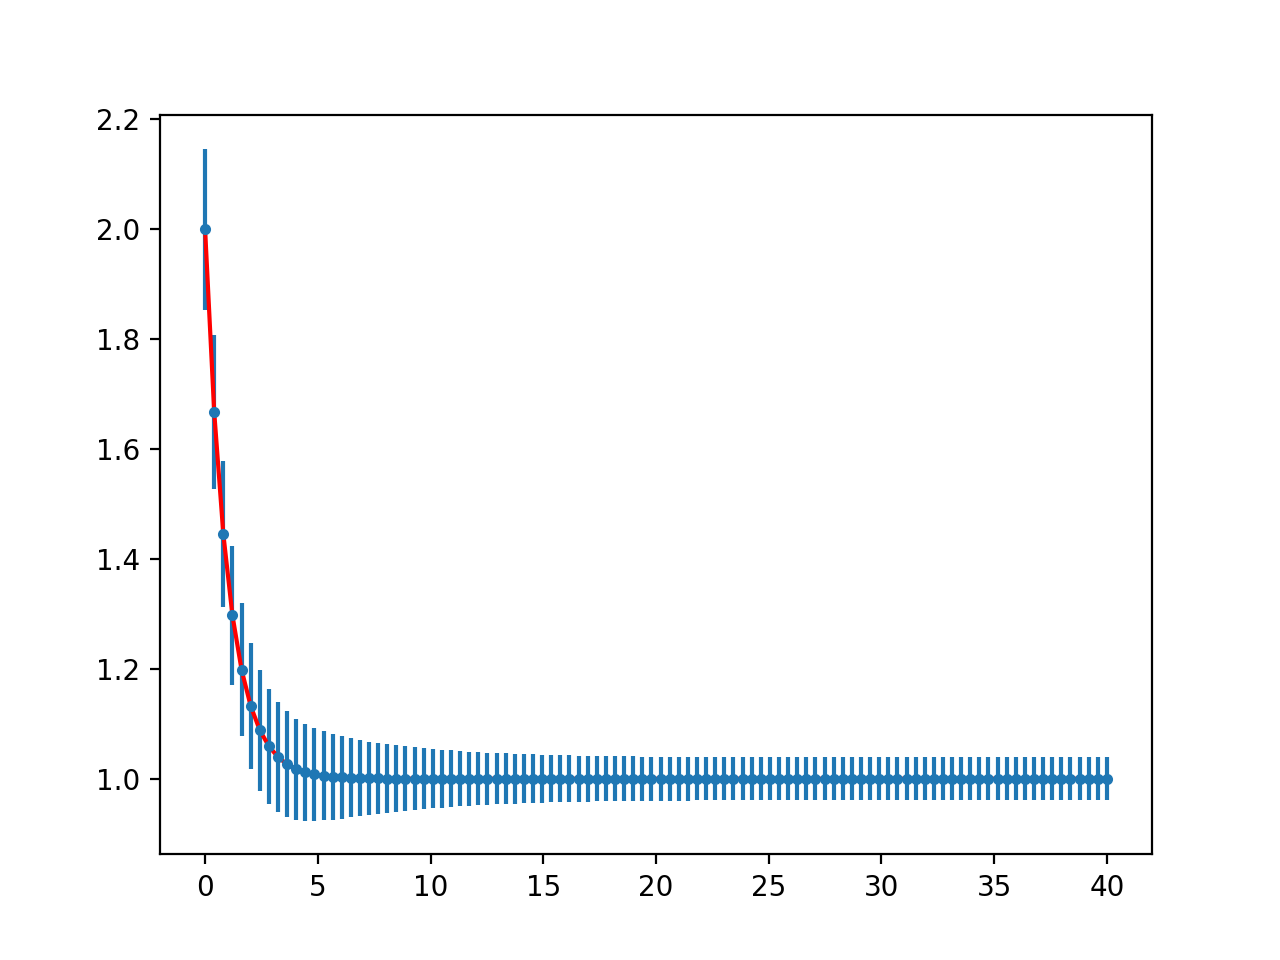

In [42]:
fig = plt.figure('Fitted Data Set')
plt.errorbar(x, y, yerr = data[:, 2], fmt='.')
plt.plot(x,f_line(x,*best_pars),'r')

<IPython.core.display.Javascript object>


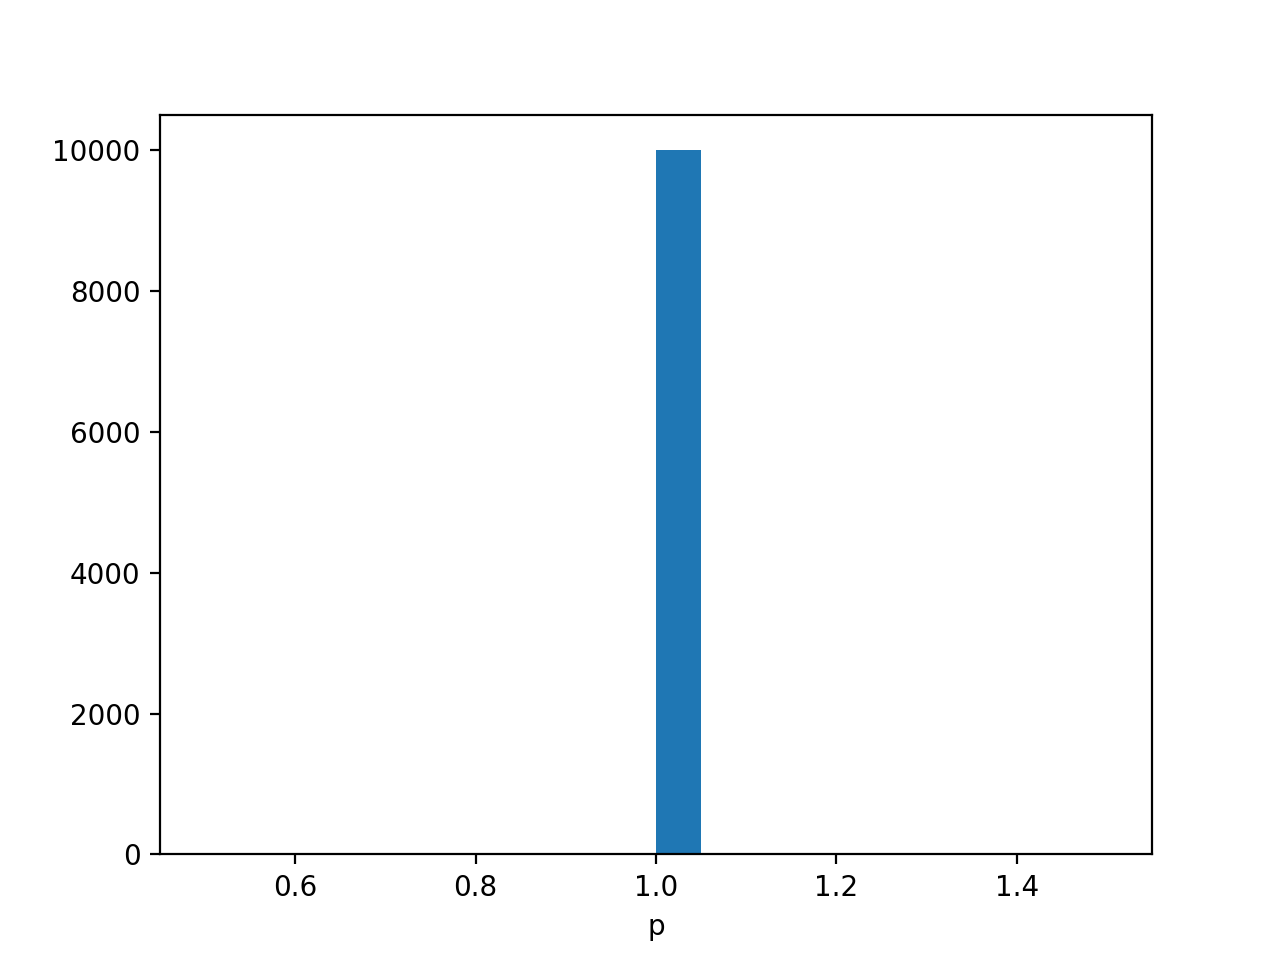

Text(0.5, 0, 'p')

In [43]:
ps = np.array(par_list)

fig4=plt.figure(4)
plt.hist(ps[:,1], bins=20)
plt.xlabel("p")